$\Huge\textbf{Quick Summary of P2P Channels}$

#### **XOR Truth Table**

The **XOR** (exclusive OR) operation compares two bits and outputs `1` if the bits are different and `0` if they are the same.

$$
\begin{array}{|c|c|l|} 
\hline \textbf{Input A} & \textbf{Input B} & \textbf{A} \oplus \textbf{B} \text{(XOR Output)} \\
\hline  0 & 0 & 0 \\
\hline  0 & 1 & 1 \\
\hline  1 & 0 & 1 \\
\hline  1 & 1 & 0 \\
\hline 
\end{array}
$$

#### **Properties of XOR:**
1. **Self-Inverse:** $A \oplus A = 0$
2. **Identity:** $A \oplus 0 = A$
3. **Symmetric:** $A \oplus B = B \oplus A$
4. **Associative:** $(A \oplus B) \oplus C = A \oplus (B \oplus C)$

This table is used to efficiently compute the Hamming distance between binary codewords.

#### **Minimum Distance and XOR**

- **Hamming distance** $d_H(x, y)$ between two binary codewords $x$ and $y$ is calculated using XOR:
$z = x \oplus y$
  The number of `1`s in $z$ gives the Hamming distance.

- The **minimum distance** $d$ of a code is the smallest Hamming distance between any two distinct codewords.

**Example:**  
For $x = 11001$ and $y = 10101$:  
- $x \oplus y = 01100$  
- Hamming distance $d_H(x, y) = 2$

This method makes finding **minimum distance** efficient for binary codes.

#### **Minimum Distance ( $d$ ) in Coding Theory**

The **minimum distance** of a block code is the smallest number of positions in which any two distinct codewords differ.

##### **Mathematical Definition:**
For a block code with codewords of length $n$, the minimum distance $d$ is given by:
$d = \min \{ d_H(x, y) \mid x \neq y \}$
where $d_H(x, y)$ is the **Hamming distance** between two codewords $x$ and $y$, defined as the number of positions where $x$ and $y$ differ.

##### **Importance of Minimum Distance:**
1. **Error Detection:**  
   The code can detect up to $d - 1$ errors.
   
2. **Error Correction:**  
   The code can correct up to $\lfloor \frac{d - 1}{2} \rfloor$ errors.

##### **Example:**
Consider a block code with the following codewords:
- $x_1 = 11001$,  
- $x_2 = 10101$,  
- $x_3 = 11100$.

Calculate pairwise Hamming distances:
- $d_H(x_1, x_2) = 2$,
- $d_H(x_1, x_3) = 2$,
- $d_H(x_2, x_3) = 3$.

The minimum distance $d$ is the smallest of these values:  
$d = 2$

This code can **detect 1 error** and **correct 0 errors** (since $\lfloor \frac{2 - 1}{2} \rfloor = 0$).

In [1]:
using Plots, LaTeXStrings

In [2]:
# Define coordinates for transmitted and received states
tx = [0, 1]
rx = [0, 1]

# Define probabilities as labels
p = [L"\epsilon", L"1 - \epsilon"];

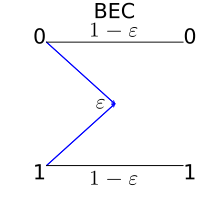

In [3]:
# Plot the BSC diagram
plot(grid=false
    , xaxis=false, yaxis=false
    , framestyle=:none, size = (200,200)
    , title = "BEC"
)

plot!([0, 0.5], [1, 0.5], arrow=:arrow, label="", color=:blue) # p line
plot!([0, 0.5], [0, 0.5], arrow=:arrow, label="", color=:blue) # p line
plot!([0, 1], [1, 1], label="", color=:black) # 1-p
plot!([0, 1], [0, 0], label="", color=:black)

# Annotate the graph
annotate!(-0.05, 1.05, tx[1]); annotate!(1.05, 1.05, rx[1])
annotate!(-0.05, -0.05, tx[2]); annotate!(1.05, -0.05, rx[2])
annotate!(0.4, 0.5, p[1]); annotate!(0.5, -0.1, p[2]); annotate!(0.5, 1.1, p[2])


# Binary Erasure Channel (BEC)

1. **Channel Model**:
   - Transmits binary symbols ($0$ or $1$).
   - Each transmitted bit is either:
     - **Received correctly** with probability $1 - \epsilon$, or
     - **Erased** with probability $\epsilon$, represented as an erasure symbol ($e$).

   Example:
   - $0 \to 0$ or $e$,
   - $1 \to 1$ or $e$.

2. **Capacity ($C$)**:
$\boxed{C = 1 - \epsilon}$
   - **$1$**: Maximum capacity with no erasures ($\epsilon = 0$).
   - **$\epsilon$**: Fraction of bits erased by the channel, reducing capacity.

3. **Behavior**:
   - $\epsilon = 0$: Perfect channel, $C = 1$.
   - $\epsilon = 1$: Completely erasing channel, $C = 0$.
   - For $0 < \epsilon < 1$: Capacity decreases linearly as $\epsilon$ increases.

---

#### Compact Intuition:
The **Binary Erasure Channel** (BEC) capacity is the fraction of bits successfully transmitted. Erasures ($\epsilon$) reduce capacity by removing information from the channel.

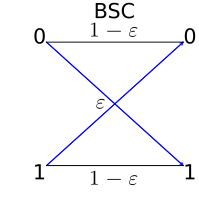

In [4]:
# Plot the BSC diagram
plot(grid=false
    , xaxis=false, yaxis=false
    , framestyle=:none, size = (200,200)
    , title = "BSC"
)

plot!([0, 1], [1, 0], arrow=:arrow, label="", color=:blue) # p line
plot!([0, 1], [0, 1], arrow=:arrow, label="", color=:blue) # p line
plot!([0, 1], [1, 1], label="", color=:black) # 1-p
plot!([0, 1], [0, 0], label="", color=:black)

# Annotate the graph
annotate!(-0.05, 1.05, tx[1]); annotate!(1.05, 1.05, rx[1])
annotate!(-0.05, -0.05, tx[2]); annotate!(1.05, -0.05, rx[2])
annotate!(0.4, 0.5, p[1]); annotate!(0.5, -0.1, p[2]); annotate!(0.5, 1.1, p[2])


# Binary Symmetric Channel (BSC)

1. **Channel Model**:
   - Transmits binary symbols ($0$ or $1$).
   - Each bit has a probability $\epsilon$ of being flipped.
   - Error probability: $P(0 \to 1) = P(1 \to 0) = \epsilon$.
   - Correct transmission probability: $P(0 \to 0) = P(1 \to 1) = 1 - \epsilon$.

2. **Capacity ($C_{BSC}$)**:
$\boxed{C_{BSC} = 1 - H_2(\epsilon)}$
   - **$1$**: Maximum capacity without errors.
   - **$H_2(\epsilon)$**: Binary entropy function, representing uncertainty due to errors.

3. **Binary Entropy Function ($H_2(\epsilon)$)**:
$\boxed{H_2(\epsilon) = - \epsilon \cdot \log_2(\epsilon) - (1 - \epsilon) \cdot \log_2(1 - \epsilon)}$
   - $H_2(0) = 0$: No errors, full capacity.
   - $H_2(0.5) = 1$: Maximum uncertainty, no capacity.

4. **Behavior**:
   - $\epsilon = 0$: Perfect channel, $C_{BSC} = 1$.
   - $\epsilon = 0.5$: Completely noisy, $C_{BSC} = 0$.
   - For $0 < \epsilon < 0.5$: Capacity decreases as $\epsilon$ increases.

---

#### Compact Intuition:
The BSC capacity is the theoretical maximum rate of reliable data transmission, reduced by the uncertainty caused by errors. Lower $\epsilon$ means higher capacity, while higher $\epsilon$ reduces it.

### AWGN Channel Summary

1. **Channel Model**:
$\boxed{y = x + w, \quad w \sim N(0, N_0)}$
   - $x$: Transmitted signal.
   - $y$: Received signal.
   - $w$: Gaussian noise with zero mean and variance $N_0$ the noise power spectral density.

2. **Signal Power**:
$\boxed{P = E[|x|^2]}$

3. **Signal-to-Noise Ratio (SNR)**:
$\boxed{SNR = \frac{P}{N_0}}$

4. **Channel Capacity**:
$\boxed{C = \log_2\left(1 + SNR\right) = \log_2\left(1 + \frac{P}{N_0}\right)}$
   - $C$: Maximum achievable data rate (in bps/Hz).

5. **Key Behavior**:
   - $P \uparrow$ (high signal power): $C \uparrow$ (more capacity).
   - $N_0 \uparrow$ (high noise): $C \downarrow$ (less capacity). 

**Insight**: The AWGN channel capacity quantifies the theoretical limit of reliable communication over a noisy channel.

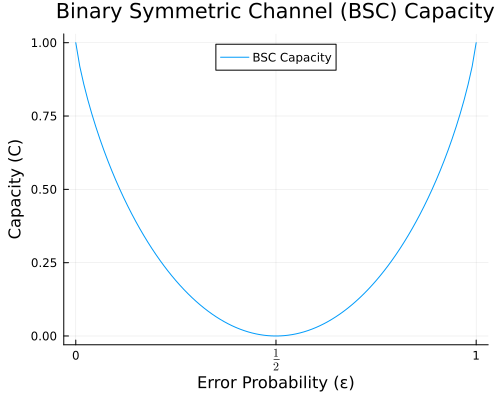

In [5]:
using Plots

# Define the binary entropy function
function H₂(ε)
    if ε == 0 || ε == 1
        return 0.0
    end
    return -ε * log2(ε) - (1 - ε) * log2(1 - ε)
end

# Define the BSC capacity function
function Cᵦₛ₍(ε)
    return 1 - H₂(ε)
end

# Generate values of ε from 0 to 1
ε_values = 0:0.01:1
capacities = Cᵦₛ₍.(ε_values)

# Plot the capacity curve
plot(ε_values, capacities,
     label = "BSC Capacity"
    , xlabel = "Error Probability (ε)", ylabel = "Capacity (C)"
    , title = "Binary Symmetric Channel (BSC) Capacity"
    , legend = :top, size = (500,400)
    , xticks = (0:0.5:1, ["0", L"\frac{1}{2}", "1"])
)

## Communication System Components:

$$\begin{align} \boxed{\text{Source}} \quad \to \underline{x} = (x_1, \dots, x_n) \to \quad \boxed{\text{Encoder}} \quad  \to \underline{c} = (c_1, \dots, c_n)  \qquad \rceil \\ \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \boxed{\text{Channel}} \\ \boxed{\text{Sink}} \quad \gets \hat{x} = (\hat{x}_1, \dots, \hat{x}_n) \gets \quad \boxed{\text{Decoder}} \quad  \gets \underline{y} = (y_1, \dots, y_n) \qquad \rfloor \end{align}$$

1. **Source**: Produces the information $\underline{x} = (x_1, \dots, x_n)$.  
2. **Encoder**: Transforms $\underline{x}$ into a codeword $\underline{c} = (c_1, \dots, c_n)$, adding redundancy.  
3. **Channel**: Transmits $\underline{c}$, introducing errors, resulting in $\underline{y} = (y_1, \dots, y_n)$.  
4. **Decoder**: Processes $\underline{y}$ to estimate $\hat{\underline{x}} = (\hat{x}_1, \dots, \hat{x}_n)$, correcting errors.  
5. **Sink**: Receives $\hat{\underline{x}}$, ideally matching $\underline{x}$.  

### Objective:
Ensure $\hat{\underline{x}} = \underline{x}$ despite channel errors.

---

### Properties of Linear Block Code

1. **Linearity**:
   - The set of codewords $\mathcal{X}$ forms a **linear subspace** of $\mathbb{F}_2^n$.
   - Any linear combination of codewords is also a valid codeword:
$\underline{v}_1 + \underline{v}_2 \in \mathcal{X}, \; \forall \underline{v}_1, \underline{v}_2 \in \mathcal{X}.$

2. **Generator Matrix ($G$)**:
   - The $k \times n$ generator matrix $G$ maps $k$-bit input vectors ($\underline{u} \in \mathbb{F}_2^k$) to $n$-bit codewords ($\underline{v} = \underline{u}^\top G$).
   - Defines the structure of the codebook $\mathcal{X}$.

3. **Code Rate ($R$)**:
   - The ratio of information bits to total bits:
$R = \frac{k}{n}$
   - Indicates the efficiency of the code.

4. **Code Size ($|\mathcal{X}|$)**:
   - The number of unique codewords:
$|\mathcal{X}| = 2^k$

5. **Minimum Hamming Distance ($d_\text{min}$)**:
   - The smallest Hamming distance between any two distinct codewords.
   - Determines the error-detecting and error-correcting capability:
$t = \left\lfloor \frac{d_\text{min} - 1}{2} \right\rfloor$
     - $t$: Maximum correctable errors.
     - $d_\text{min} - 1$: Maximum detectable errors.

6. **Parity Check Matrix ($H$)**:
   - The $H$ matrix defines the null space of $G$:
$H G^\top = 0$
   - Used to verify codewords:
$\underline{v} H^\top = 0 \implies \underline{v} \in \mathcal{X} \subseteq \mathbb{F}_2^n$

7. **Error Detection and Correction**:
   - Error detection: Capable of detecting up to $d_\text{min} - 1$ errors.
   - Error correction: Can correct up to $\lfloor \frac{d_\text{min} - 1}{2} \rfloor$ errors.

8. **Redundancy**:
   - The number of redundant bits added for error correction is $n - k$, where $n$ is the codeword length.

---

### Compact Summary:
- **Linear subspace**: Codewords form a subspace of $\mathbb{F}_2^n$.
- **Size**: $|\mathcal{X}| = 2^k$.
- **Rate**: $R = \frac{k}{n}$.
- **Error capabilities**: Based on $d_\text{min}$.
- Defined by:
  - **Generator matrix ($G$)**.
  - **Parity check matrix ($H$)**.

---

#### Error Correction

Error Correction **Code $\mathcal{X}$**  
Linear error corr. **Code $\mathcal{X}$**  

#### **Code Rate**:  
$\boxed{R = \frac{k}{n}}$

##### Explanation:

- **Code Rate** ($R$) is the fraction of a codeword used for information:
  - $k$: Number of information bits.
  - $n$: Total number of bits in the codeword (information + redundancy).
- **Trade-off**:
  - Higher $R$ ($R \to 1$): More efficient but less error protection.
  - Lower $R$ ($R \to 0$): Less efficient but better error correction.
 

#### **Linear Block Code Definition**:  
$\boxed{\mathcal{X} = \{ \underline{v} = \underline{u}^\top G, \; \underline{u} \in \mathbb{F}_2^k \}}$

##### Explanation:
- $\mathcal{X}$: The **set of all codewords** in the code (codebook).
- $\underline{u}$: A binary **message vector** of length $k$ ($\underline{u} \in \mathbb{F}_2^k$).
- $G$: The **generator matrix** ($k \times n$) used to map $\underline{u}$ to a codeword.
- $\underline{v}$: A binary **codeword** of length $n$ ($\underline{v} \in \mathbb{F}_2^n$).

##### Key Points:
1. Each $\underline{u}$ maps to a unique $\underline{v}$ via $\underline{v} = \underline{u}^\top G$.
2. The total number of codewords is $2^k$ (one for each $\underline{u}$).
3. $\mathcal{X}$ is a **linear subspace** of dimension $k$ in $\mathbb{F}_2^n$.

##### Compact Summary:
$\mathcal{X}$ is the **codebook** of a linear block code, where each codeword $\underline{v}$ is generated by multiplying a $k$-bit message vector $\underline{u}$ with the generator matrix $G$.

---

**Code Size**:  $|\mathcal{X}| = 2^k$

- $k$-bit message vectors ($\underline{u} \in \mathbb{F}_2^k$) are mapped to $n$-bit codewords ($\underline{v} = \underline{u}^\top G$) via the generator matrix $G$.
- The codebook $\mathcal{X}$ forms a linear subspace with $2^k$ unique codewords, corresponding to the $k$-bit input combinations.

- **Minimum Hamming Distance**:  
$d_\text{min} = \min \{ d_H(x_i, x_j) \}, \; \forall x_i, x_j \in \mathcal{X}, \; x_i \neq x_j$
  (Hamming distance)

- **Linear Code Minimum Distance**:  
$d_\text{min} = \min\limits_{\binom{\underline{x}_i, \underline{x}_j \in \mathcal{X}}{x_i \neq x_j}} \big\{ d_H(x_i, x_j) \big\} = \min\limits_{x \in \mathcal{X}} \big\{ W_H(\underline{x}) \big\}$

- **Parity Check Relation**:  
$\underline{v} H^\top = 0 \implies \underline{v} \in \mathcal{X} \subseteq \mathbb{F}_2^n$

### Parity Check Matrix
- $H \in \mathbb{F}_2^{(n-k) \times n}$
- $\dim(\text{Im}(G)) = k$
- $H = \text{null}(G^\top), \; \dim = n - k$

In [6]:
using LinearAlgebra

# Define the parity check matrix H (size 3x7 for (7, 4) code)
H = [
    1 0 0 1 1 1 0;
    0 1 0 1 1 0 1;
    0 0 1 1 0 1 1
]

# Define the generator matrix G
G = [
    1 0 0 0 1 1 0;
    0 1 0 0 1 0 1;
    0 0 1 0 0 1 1;
    0 0 0 1 1 1 1
];

In [7]:
# Message vector
u̲ = [1 0 1 0]

# Generate codeword
v̲ = mod.(u̲ * G, 2)
println("Generated codeword: ", v̲)  # Should be a valid codeword


Generated codeword: [1 0 1 0 1 0 1]


In [8]:
# Parity check validation
parity_check = mod.(v̲ * H', 2)
println("Parity check result: ", parity_check)  # Should be [0, 0, 0]

Parity check result: [0 0 0]


In [9]:
using LinearAlgebra

# Define the generator matrix G (4x7 for (7,4) code)
G = [
    1 0 0 0 1 1 0;
    0 1 0 0 1 0 1;
    0 0 1 0 0 1 1;
    0 0 0 1 1 1 1
]

# Generate all possible messages (4-bit binary combinations)
messages = [bitstring(i)[end-3:end] for i in 0:2^4-1]  # 4-bit binary strings
u̲ = [parse.(Int, split(m, ""))' for m in messages]; @show u̲;  # Convert to row vectors (1x4) u\underbar

# Generate all codewords using G
𝒳 = [mod.(u * G, 2) for u in u̲ ]; @show 𝒳

# Define a function to compute Hamming distance
function hamming_distance(v₁ , v₂)
    sum(v₁ .!= v₂)  # Count differing elements
end

# Compute the minimum Hamming distance using a comprehension
dₘᵢₙ = minimum(
    hamming_distance(𝒳[i], 𝒳[j]) for (i, j) 
        in Iterators.product(1:length(𝒳), 1:length(𝒳)) if i < j
)

# Output the result
println("Minimum distance of the code: ", dₘᵢₙ)


u̲ = Adjoint{Int64, Vector{Int64}}[[0 0 0 0], [0 0 0 1], [0 0 1 0], [0 0 1 1], [0 1 0 0], [0 1 0 1], [0 1 1 0], [0 1 1 1], [1 0 0 0], [1 0 0 1], [1 0 1 0], [1 0 1 1], [1 1 0 0], [1 1 0 1], [1 1 1 0], [1 1 1 1]]
𝒳 = [[0 0 0 0 0 0 0], [0 0 0 1 1 1 1], [0 0 1 0 0 1 1], [0 0 1 1 1 0 0], [0 1 0 0 1 0 1], [0 1 0 1 0 1 0], [0 1 1 0 1 1 0], [0 1 1 1 0 0 1], [1 0 0 0 1 1 0], [1 0 0 1 0 0 1], [1 0 1 0 1 0 1], [1 0 1 1 0 1 0], [1 1 0 0 0 1 1], [1 1 0 1 1 0 0], [1 1 1 0 0 0 0], [1 1 1 1 1 1 1]]
Minimum distance of the code: 3


### Parity Check Matrix ($H$):

1. **Dimensions**:
$H \in \mathbb{F}_2^{(n-k) \times n}$
   - $n$: Codeword length.
   - $n-k$: Number of parity checks.

2. **Relation to $G$**:
   - $G$: Generates the code subspace with:
$\dim(\text{Im}(G)) = k$
   - $H$: Defines the null space of $G^\top$:
$H = \text{null}(G^\top)$

3. **Validation Condition**:
   - A valid codeword satisfies:
$\underline{v} H^\top = 0$

4. **Null Space Dimension**:
$\dim(\text{null}(G^\top)) = n - k$


### Systematic Code:
A linear block code is called **systematic** if:
1. **Codeword Structure**:

$$\boxed{\underline{v} = [\text{information bits} \; | \; \text{parity bits}]}$$
   - The first $k$ bits are the unaltered information bits.
   - The last $n-k$ bits are the parity bits.

2. **Generator Matrix**:

$$\boxed{G = [I_k \; \vdots \; P_{k \times (n-k)}]_{k \times n}}$$

   - $I_k$: Identity matrix for information bits.
   - $P$: Parity matrix for redundancy.

3. **Parity Check Matrix**:

$$\boxed{H = [I_{n-k} \; \vdots \; P_{(n-k) \times k}^\top]}$$

4. **Benefits**:
   - Direct access to information bits.
   - Simplifies encoding and decoding.

### The Generator Matrix ($G$):

1. **Definition**:
   - $G \in \mathbb{F}_2^{k \times n}$, maps $k$-bit messages $\underline{u}$ to $n$-bit codewords $\underline{v}$:
$\underline{v} = \underline{u}^\top G$

2. **Structure** (for systematic codes):

$\boxed{G = [I_k \; \vdots \; P_{k \times (n-k)}]_{k \times n}}$
   - $I_k$: $k \times k$ identity matrix (information bits).
   - $P$: $k \times (n-k)$ parity matrix (defines redundancy).

4. **Steps to Generate $G$**:
   - Determine code parameters: $n$, $k$, and $n-k$.
   - Design $P$ to ensure $H G^\top = 0$, where $H$ is the parity-check matrix.
   - Combine $I_k$ and $P$ to construct $G$.

5. **Example** ($(7, 4)$ Hamming Code):
The $(7, 4)$ Hamming code has:
- $k = 4$ information bits.
- $n = 7$ total bits ($n - k = 3$ parity bits).

-> Steps:

- $I_k$ is a $4 \times 4$ identity matrix.
- $P$ is a $4 \times 3$ matrix:
$P = \begin{bmatrix} 1 & 1 & 0 \\ 1 & 0 & 1 \\ 0 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$

- Combine $I_k$ and $P$ to get $G$:
$G = \begin{bmatrix} 1 & 0 & 0 & 0 & 1 & 1 & 0 \\ 0 & 1 & 0 & 0 & 1 & 0 & 1 \\ 0 & 0 & 1 & 0 & 0 & 1 & 1 \\ 0 & 0 & 0 & 1 & 1 & 1 & 1 \end{bmatrix}$


$G$ encodes $k = 4$ information bits into $n = 7$ codeword bits.

### The **parity check matrix** ($H$)

For systematic linear block codes like the Hamming code, the parity check matrix $H$ is typically written in the form:

$$\boxed{H_{(n-k) \times n} = [I_{n-k} \; \vdots \; P_{(n-k) \times k}^\top]}$$

This is the **standard form** of the parity check matrix.

---

### Formulation of $H$:

1. **Structure**:
   - $I_{n-k}$: Identity matrix of size $(n-k) \times (n-k)$, representing the parity bits.
   - $P^\top$: Transpose of the parity matrix $P$ from $G = [I_k \; P]$.

   The matrix $H$ ensures that:
$H G^\top = 0$

2. **Dimensions**:
   - $H \in \mathbb{F}_2^{(n-k) \times n}$:
     - Rows: $n-k$ (number of parity check equations).
     - Columns: $n$ (length of the codeword).

---

### Example: (7, 4) Hamming Code

1. **Generator Matrix $G$**:
$G = \begin{bmatrix} I_4 & P \end{bmatrix}$
   where:
$P = \begin{bmatrix} 1 & 1 & 0 \\ 1 & 0 & 1 \\ 0 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$

2. **Transpose of $P$**:
$P^\top = \begin{bmatrix} 1 & 1 & 0 & 1 \\ 1 & 0 & 1 & 1 \\ 0 & 1 & 1 & 1 \end{bmatrix}$

3. **Identity Matrix $I_{n-k}$**:
$I_{3} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$

4. **Parity Check Matrix $H$**:
   Combine $I_{n-k}$ and $P^\top$:
$H = \begin{bmatrix} I_{3} & P^\top \end{bmatrix} = \begin{bmatrix} 1 & 0 & 0 & 1 & 1 & 1 & 0 \\ 0 & 1 & 0 & 1 & 1 & 0 & 1 \\ 0 & 0 & 1 & 1 & 0 & 1 & 1 \end{bmatrix}$

---

### Summary:
- For systematic codes, the parity check matrix is:
$H = \begin{bmatrix} I_{n-k} & P^\top \end{bmatrix}$
- It is derived to satisfy:
$H G^\top = 0$
- In the (7,4) Hamming code, $H$ has dimensions $3 \times 7$, combining $I_3$ and $P^\top$.

- **Parity Check Matrix** is used to decode the RX vector when Decoding is **not optimal (generally)**, when you work with Tanner graph which representation of $H$.

### Hamming Code:
$H = \begin{bmatrix} 1 & 1 & 0 & 1 & 0 & 0 & 1 \\ 1 & 0 & 1 & 1 & 0 & 1 & 0 \\ 0 & 1 & 1 & 1 & 1 & 0 & 0 \end{bmatrix}_{\to \text{3 check nodes}}^{\downarrow \text{7 variable nodes}}$

**(n-k):** 

3 linear equations, that may valid, non-erroneous TX must satisfy


$\begin{align*} x = (C_2, C_3, C_4, C_5, C_6, C_7, C_1) \\ C_1 + C_2 + C_3 + C_5 = 0 \\ C_1 + C_3 + C_4 + C_6 = 0 \\ C_1 + C_2 + C_7 = 0 \end{align*}$



Is Bipartite: true
Number of nodes: 5
Number of edges: 5


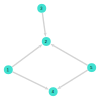

In [13]:
using Graphs  # For graph representation
using GraphPlot  # For graph visualization

# Create a directed graph
tanner = DiGraph(5)  # A directed graph with 5 nodes

# Add edges to create an acyclic structure
add_edge!(tanner, 1, 2)
add_edge!(tanner, 1, 4)
add_edge!(tanner, 3, 2)
add_edge!(tanner, 5, 2)
add_edge!(tanner, 5, 4)

println("Is Bipartite: ", is_bipartite(tanner))
# Display basic properties of the graph
println("Number of nodes: ", nv(tanner))  # Number of vertices
println("Number of edges: ", ne(tanner))  # Number of edges

# Print edges of the graph
gplot(tanner, nodelabel=1:5)

When writing large codes:

**Tanner Graphs** (bipartite graph):

$\begin{array}{|c|c|l|} \hline \textbf{Variable Nodes} & \textbf{Check Nodes} & \textbf{Equation} \\ \hline C_1                     &                       & C_1 + C_2 + C_3 + C_5 = 0 \\ \hline C_2                     &                       & C_1 + C_3 + C_4 + C_6 = 0 \\ \hline C_3                     &                       & C_1 + C_2 + C_7 = 0 \\ \hline \end{array}$

Tanner Graph representation used in decoding codes in an **soft** manner.  **Soft Decoding**:
- [Passing **likelihood information** for each node votes].
- **Soft decoding** is generally **suboptimal**, unless it is such that the corresponding Tanner graph has **no cycles**.

**This Cycle Consideration** brought to the fore
- **Low-Density Parity Check Codes (LDPC)**. Gallager 1960
- LDPC codes have a **sparse $H$**.


- **LDPC**
  - $H$ is sparse.
  - Number of edges in the Tanner graph grows only linearly in $n$.
  - LDPC facilitates soft (iterative) decoding.
  - Iterative exchange of information.
  - Allows for simple local passing of information (at the node).

- **Regular LDPC**
  - $n, J, k$
    - $n$: Codeword length.
    - $J$: Degree of each variable node.
    - $k$: Degree of each check node.

Location of ones in $H$ is chosen to have a certain randomness, subject to a structure that guarantees decoding performance.


Gallager $(n = 20, J = 3, k = 4 )$ Construction

- $H = 15 \times 20$

Pick at Random

$G = \begin{bmatrix} 
1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 
\end{bmatrix}$

Columns of first submatrix

$\pi_1 = \begin{bmatrix} 
1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 \\ 
0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 
0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 \\ 
0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 
\end{bmatrix}$

$\pi_2 = \begin{bmatrix} 
1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 1 \\ 
0 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 
0 & 0 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 1 & 0 
\end{bmatrix}$



Turbo Codes (uses Convolutional Codes)

![Figure (with permutations and Convolutions](images/fig_turbo_codes.png)


- Three Main powerful Codes
    - Turbo Codes $\approx 1992$
    - LDPC Codes  Gallager $\approx 1960$
    - Polar Codes

- **All 3 codes achieve Capacity ($\approx$) with easier decoding**
    - LDPC easier to decode than Turbo
    - Polar has smaller error decay (a little bit slower)

---

# **Polar Codes**
  
### Notation:
- $X, Y \sim P_{X, Y}$:
$$\begin{align}
      H(X) &= -\mathbb{E} \, \log P(X) \\
           &= -\sum_x P(x) \log P(x)
           \end{align}
$$

Higher$H$: More uncertainty

- $H(X | Y)$: Joint Entropy
- $I(X; Y) = \underbrace{H(X)}_{10} - \underbrace{H(X | Y)}_{ - 7} \quad \underbrace{\textbf{= Mutual Information}}_\text{= 3 Bits of Information}$

### Formulas: 
-
$\begin{align} H(X | Y) &\overset{\Delta}{=} -\mathbb{E}_{x,y} \, \log P(X | Y) \\ &= \sum_{x, y} P(x, y) \log \frac{1}{P(x | y)} \end{align}$

- $I(X; Y) = \sum\limits_{x, y} P(x, y) \log \frac{P(x, y)}{P(x) P(y)}$

- $X^n = (X_1, \dots, X_n)$
- $Y^n = (Y_1, \dots, Y_n)$$\qquad (X^n,Y^n) \sim P_{x^n,Y^n}$

### Chain Rule:

$\boxed{ H(X^n | Y^n) = \sum\limits_{i=1}^n H(X_i | Y^n, X^{i-1}) \; \textbf{ Where } \; X^{i-1} = (X_1, \dots, X_{i-1})}$


$H(X_1 | Y^n) + H(X_2 | X_1, Y^n) + H(X_3 | \underbrace{X_1, X_2}_{(\because)}, Y^n) + \dots$

> $(\because)$ know the 2 previous days, (this is the chain rule).


$\begin{align} I(X^n; Y^n) &= \sum\limits_{i=1}^n I(X_i; Y^n | X^{i-1}) \\ &= I(X_1; Y_n) + I(X_2, Y_n| X_1) + \cdots \end{align}$


**Result (math)**

### Principle of Polarization
- Let $X \sim P_X$, $\mathcal{X} = \{0, 1\}$
- Let $X_1, X_2, \dots$ i.i.d. $\sim X$
- Let $N = 2^n$, $n > 1$
- Let $X^n = \{X_1, X_2, \dots, X_n\}$

- Let:
$F = \begin{bmatrix} 1 & 0 \\ 1 & 1 \end{bmatrix}$, $F^{\otimes n}$= $n$-power Kronecker product of $F$
  
$F^{\otimes 2} = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 1 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 1 & 1 \end{bmatrix}$

$F^{\otimes 3} = \begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 \end{bmatrix}$

- Let $u^N = x^N \cdot F^{\otimes n}$

### Theorem:
- For any fixed $\delta > 0$:
- 
$\boxed{\lim_{N \to \infty} \frac{1}{N} \left| \{ i \in \{1, 2, \dots, N\} \mid H(u_i | u^{i-1}) \in [\delta, 1-\delta] \} \right| = 0}$

- It says that:
$H(u_i | u^{i-1}) \to \begin{cases} 0       & \boxed{\text{ nothing in between them}} \\ 1 \end{cases}$



![no uncertainty](images/fig_no_uncertainty.png) **no uncertainty**



### Polarization Kernel and Kronecker Power

1. **Base Matrix $F$:**
$F = \begin{bmatrix} 1 & 0 \\ 1 & 1 \end{bmatrix}$

2. **Kronecker Power $F^{\otimes n}$:**
   - Recursive definition:
$F^{\otimes n} = F^{\otimes (n-1)} \otimes F$
   - $\otimes$: Kronecker product.

3. **Examples:**
   - $F^{\otimes 1} = F$
   - $F^{\otimes 2}$:
$\begin{bmatrix} 1 & 1 & 0 & 0 \\ 1 & 0 & 0 & 0 \\ 1 & 1 & 1 & 1 \\ 1 & 0 & 1 & 0 \end{bmatrix}$
   - $F^{\otimes 3}$:
$\begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 \end{bmatrix}$

4. **Purpose:**
   - $F^{\otimes n}$ transforms $X^N \to U^N = X^N \cdot F^{\otimes n}$.
   - Enables **channel polarization**, splitting channels into highly reliable and unreliable sets for polar codes.


For any $\delta > 0$, in fact $\delta \approx 2^{-\sqrt{n}}$  
(i.e. $\delta$ can be as low as?)

---

### Example:
- $n= 2, \; F = \begin{bmatrix} 1 & 0 \\ 1 & 1 \end{bmatrix}$

$(u_1, u_2) = (x_1, x_2) \cdot  \begin{bmatrix} 1 & 0 \\ 1 & 1 \end{bmatrix} = \begin{bmatrix} x_1 \oplus x_2, x_2 \end{bmatrix}$

- $n = 4, \; F^{\otimes 2} = \begin{bmatrix} 10 & 00 \\ 11 & 00 \\ 10 & 10 \\ 11 & 11 \end{bmatrix}$

$(u_1, u_2, u_3, u_4) = (x_1, x_2, x_3, x_4) \cdot F^{\otimes 2} = [ \underbrace{x_1 \oplus x_2 \oplus x_3 \oplus x_4}_{u_1} , \underbrace{x_2 \oplus x_4}_{u_2}  , \underbrace{x_3 \oplus x_4}_{u_3}  , \underbrace{x_4}_{u_4}  ]$


### Kronecker Product:
$A = \begin{bmatrix} a_{11} & a_{12}  & \cdots \\ a_{21} & a_{22}s \\ \vdots \end{bmatrix}, B \qquad$
$A \otimes B = \begin{bmatrix} a_{11}B & a_{12}B \\ a_{21}B & \cdots \end{bmatrix}$

---

### key result in **polar codes** and **channel polarization**

$x_1, x_2, \dots, x_n \qquad X \sim  \text{i.i.d.}$

$u^n = x^n \cdot F^n$

#### Corollary:
$\frac{\left[ \{ i : H(u_i | u^{i-1}) > 1 - \delta \} \right]}{N} = H(X)$

### Proof:
$H(u^n) = H(x^n) = n \, H(x) (i.i.d)$

This describes a key result in **polar codes** and **channel polarization**, where the **entropy** and structure of the polar transformation are analyzed mathematically.

#### Explanation:

1. **Setup:**
   - $x_1, x_2, \dots, x_n$: A sequence of independent and identically distributed (**i.i.d.**) random variables from the source $X$.
   - $u^n = x^n \cdot F^n$: The transformation of $x^n$ using the **Kronecker power** of $F$ (polarization matrix) to produce the vector $u^n$.
     - This defines the encoding operation in polar codes.

2. **Corollary:**
   - The fraction of indices $i$ for which the **conditional entropy** $H(u_i | u^{i-1}) > 1 - \delta$ (i.e., where uncertainty is high) is proportional to the **source entropy** $H(X)$:
$\frac{\left| \{ i : H(u_i | u^{i-1}) > 1 - \delta \} \right|}{N} = H(X).$
   - This result demonstrates how the **polarization process** concentrates certain indices with high entropy (bad channels) and others with low entropy (good channels).

3. **Proof Outline:**
   - Since $x_1, x_2, \dots, x_n$ are i.i.d., the total entropy of the source sequence $x^n$ is:
$H(x^n) = n \cdot H(X).$
   - The polar transformation preserves entropy (it’s a linear transformation), so:
$H(u^n) = H(x^n) = n \cdot H(X).$
   - This shows that the entropy is distributed across the components of $u^n$, leading to the polarization effect.

#### Key Idea:

- **Channel Polarization**:
  - The transformation $F^n$ polarizes the "channels" (indices $i$) into two categories:
    1. Channels with **high reliability** ($H(u_i | u^{i-1}) \approx 0$): These are the "good" channels used to carry information.
    2. Channels with **low reliability** ($H(u_i | u^{i-1}) \approx 1$): These are the "bad" channels, which are "frozen" (fixed to known values).

- The corollary quantifies this polarization, stating that the fraction of good channels corresponds to the source entropy $H(X)$.

#### Summary:

- **Transformation**: $u^n = x^n \cdot F^n$ is the polar transformation.
- **Result**: The fraction of "good" channels (low-entropy) matches the source entropy $H(X)$.
- **Proof**: Entropy is conserved, and the polarization process redistributes it across the indices of $u^n$.

This result is central to the design and analysis of **polar codes**, enabling efficient encoding and decoding. 

---

$H(u^N) = \sum\limits_{i=1}^N \underbrace{H(u_i | u^{i-1})}_\text{(chain rule)} \quad  = N \cdot H(X)$$(\because)$

But recall (from theorem) that the \# of terms where:
$H(u_i | u^{i-1}) \in (\delta, 1-\delta) \quad \text{is near zero.}$

$\approx 0 \cdot \Big| \overbrace{H(u_i | u^{i-1})}^{\# \text{of times }} \approx 0 \Big| + 1 \cdot \Big| \overbrace{H(u_i | u^{i-1})}^{\# \text{of times }} \approx 1 \Big|$

All the entropy accumulated in summation is due to $K$ terms where:
$H(u_i | u^{i-1}) \in (1 - \delta, 1).$

### Accumulated Entropy:
$K \cdot 1 = N \cdot H(X) \quad (\text{from }\because) \implies \frac{K}{N} = H(X).$

$H(X) \approx 0.3 \qquad \text{30\% of } H(u_i | u^{i-1}) \approx 1's, \quad 70\% \approx 0.$

![accumulated entropy](images/fig_accumulated_entropy.png)

![channel polarization](images/fig_channel_polarization.png)


#### Explanation of $K \cdot 1 = N \cdot H(X) \implies \frac{K}{N} = H(X)$

This equation arises in the context of **polar codes** and **channel polarization**, describing how the total entropy is distributed among the indices of the polar transformation.

---

#### Definitions and Context:

1. **Terms**:
   - $K$: The number of indices $i$ where the **conditional entropy** $H(u_i | u^{i-1})$ contributes meaningfully to the total entropy (i.e., $H(u_i | u^{i-1}) \approx 1$).
   - $N$: The total block length (number of indices in $u^N$).
   - $H(X)$: The entropy of the source variable $X$, which determines the overall proportion of good (reliable) channels in the polarization process.

2. **Accumulated Entropy**:
   - The total entropy of the transformed vector $u^N$ is:
$H(u^N) = N \cdot H(X),$
     since entropy is preserved during the linear transformation $u^N = x^N \cdot F^N$.

#### Key Idea:

- **Entropy Contribution**:
  - The entropy $H(u^N)$ is primarily accumulated in the $K$ terms where $H(u_i | u^{i-1}) \approx 1$ (good channels).
  - For other indices, $H(u_i | u^{i-1}) \approx 0$, meaning they contribute negligible entropy.

- **Total Accumulated Entropy**:
  - If $K$ terms contribute nearly $1$ unit of entropy each, the total entropy contributed by these terms is:
$K \cdot 1 = N \cdot H(X).$

- **Proportion of Good Channels**:
  - Dividing through by $N$, we find that the proportion of indices $i$ where $H(u_i | u^{i-1}) \approx 1$ is:
$\frac{K}{N} = H(X).$

#### Meaning:

- $\frac{K}{N} = H(X)$ indicates that the fraction of "good channels" (indices $i$ where $H(u_i | u^{i-1})$ is significant) corresponds to the source entropy $H(X)$.
- For example:
  - If $H(X) = 0.3$, then 30% of the channels are reliable, while 70% are unreliable (contributing $H(u_i | u^{i-1}) \approx 0$).

#### Importance in Polar Codes:

This relationship quantifies **channel polarization**, where:
- A fraction $H(X)$ of the channels becomes highly reliable (used for transmitting information).
- The remaining fraction $1 - H(X)$ becomes unreliable (frozen).

This ensures that polar codes can efficiently encode and decode data based on the structure of $F^N$.


---

### Channel Polarization

$X \to \boxed{ W } \to Y$$\qquad X$is Input to the memoryless channel$W$.

**Recall**:
$(x, y) \sim P_{X,Y}(x, y)$

$$
\begin{align}
P(X, Y) &= P_X(x) \cdot P_{Y|X}(y|x) \\
        &= P_X(x) \cdot W_{Y|X}(y|x)
\end{align}
$$

Using Bayes’ Rule:
$P_{X|Y}(x|y) = \frac{P_{Y|X}(y|x) \cdot P_X(x)}{P_Y(y)} \quad \text{(Channel Fixed)}.$

---

**Assume**:
- $X \sim X_1, X_2, \dots, X_n$,  
- $X$ is discrete, $X \in \{0, 1\}$,  
- Assume Binary Symmetric Channel (BSC).

For $N = 2^n$:
$U^N = X^N \cdot F^n$
$U^N$: Input of the following **bigger channel**:

---

### Diagram:
- $W$: Memoryless channel,
- $U_1, U_2, \dots, U_N$: Input,
- $Y_1, Y_2, \dots, Y_N$: Output.

This process **creates bad and good channels**, enabling **channel polarization**.


#### **1. Singleton Bound:**
The **Singleton bound** is a theoretical limit in coding theory that relates the code length, code rate, and minimum distance of a block code. It sets a limit on the trade-off between error correction and code efficiency.

##### **Definition:**
For a block code with parameters $[n, k, d]$:
- $n$: Codeword length.
- $k$: Number of information symbols.
- $d$: Minimum Hamming distance between any two distinct codewords.

The **Singleton bound** states:
$d \leq n - k + 1$

This means that for a code of length $n$ and $k$ information symbols, the minimum distance $d$ cannot exceed $n - k + 1$.

#### **2. MDS Codes (Maximum Distance Separable Codes):**
A code that achieves the Singleton bound with equality is called an **MDS (Maximum Distance Separable) code**.

##### **Definition:**
A block code is called an MDS code if:
$d = n - k + 1$

MDS codes have the **maximum possible minimum distance** for their given length $n$ and dimension $k$.

#### **Properties of MDS Codes:**
1. **Error correction and detection:**
   - An MDS code can correct up to $\lfloor \frac{d - 1}{2} \rfloor$ errors.
   - It can detect up to $d - 1$ errors.

2. **Examples of MDS Codes:**
   - **Reed-Solomon codes**: Widely used in communication systems (e.g., CDs, DVDs, and QR codes).
   - **Simple parity check codes**: (e.g., $[n, n-1, 2]$), which can detect a single error.
   - **Repetition codes**: (e.g., $[n, 1, n]$), which repeat the same symbol multiple times.

3. **Generator Matrix Properties:**
   For an MDS code, any $k \times k$ submatrix of the generator matrix is invertible.

4. **Dual Codes**: 
   The dual of an MDS code is also MDS, with parameters $[n, n-k, k+1]$.

#### **Example: Reed-Solomon Code**
For a **Reed-Solomon** code with parameters $[n, k, d]$:
- $n = q - 1$ (over a finite field of size $q$),
- $d = n - k + 1$, which achieves the Singleton bound.

This is why Reed-Solomon codes are essential in applications where robust error correction is needed.

#### **Summary:**
- The **Singleton bound** defines an upper limit on the minimum distance of a block code.
- **MDS codes** achieve this limit and have the highest error correction capabilities for a given code length and dimension.

#### **Numerical Problem: Singleton Bound and MDS Code**

A communication system uses a block code with the following parameters:
- Code length $n = 10$,
- Number of information symbols $k = 6$.

1. **Calculate the Singleton bound** for this code.
2. If the code has a minimum distance $d = 5$, is this code an MDS code?
3. Determine how many errors this code can **correct** and **detect**.

#### **Solution Steps:**

##### **Step 1: Singleton Bound Calculation**
The Singleton bound is given by:
$d \leq n - k + 1$

Substitute $n = 10$ and $k = 6$ into the formula:
$d \leq 10 - 6 + 1 = 5$

Thus, the Singleton bound for this code is **5**.

##### **Step 2: Check if the code is MDS**
The code has $d = 5$, which equals the Singleton bound. Therefore, the code **achieves the Singleton bound** and is an **MDS code**.

##### **Step 3: Error Correction and Detection**
For an MDS code with $d = 5$:

1. **Error correction capability:**
   The number of errors the code can correct is:
$t = \left\lfloor \frac{d - 1}{2} \right\rfloor = \left\lfloor \frac{5 - 1}{2} \right\rfloor = \left\lfloor 2 \right\rfloor = 2$

   So, the code can correct **2 errors**.

2. **Error detection capability:**
   The code can detect up to **$d - 1 = 4$** errors.

#### **Final Answers:**
1. Singleton bound: $d \leq 5$,
2. The code is an **MDS code** since $d = 5$,
3. The code can correct **2 errors** and detect **4 errors**.

#### **Sphere Packing Bound in Coding Theory**

The **sphere packing bound** (also known as the **Hamming bound**) gives a limit on how many codewords can fit in a Hamming space without their **error correction spheres** overlapping. It connects the **packing radius**, **covering radius**, and code parameters like the minimum distance $d$.

### **Formal Statement of the Bound:**

For a block code with parameters $[n, k, d]$, where:
- $n$: Codeword length,
- $k$: Number of information symbols (dimension of the code),
- $d$: Minimum distance between codewords,
- $t = \lfloor (d-1)/2 \rfloor$: Error correction radius (packing radius),

The sphere packing bound is:
$M \cdot V(t, n) \leq 2^n$

Where:
- $M = 2^k$ is the number of codewords.
- $V(t, n)$ is the volume of a Hamming ball of radius $t$, given by:
$V(t, n) = \sum_{i=0}^{t} \binom{n}{i}$

#### **Explanation:**

- The **packing radius** $t$ defines the maximum number of errors a code can correct.
- Each codeword has a Hamming sphere of radius $t$.
- The total volume occupied by these spheres must not exceed the size of the entire Hamming space, $2^n$.
- This constraint limits the maximum number of codewords $M$, ensuring no overlapping.

#### **Perfect Codes and the Sphere Packing Bound:**

A **perfect code** achieves equality in the sphere packing bound:
$M \cdot V(t, n) = 2^n$

This means that:
1. The code's **error spheres** fill the Hamming space exactly, without gaps or overlaps.
2. For perfect codes, the **covering radius** $R$ equals the **packing radius** $t$.

#### **Example: Hamming Code**

Consider a Hamming code with parameters $[7, 4, 3]$:
- $n = 7$, $k = 4$, $d = 3$, and $t = 1$.
- The volume of a Hamming sphere with radius $t = 1$ is:
$V(1, 7) = \binom{7}{0} + \binom{7}{1} = 1 + 7 = 8$
- The number of codewords is $M = 2^k = 16$.

Check the sphere packing bound:
$M \cdot V(1, 7) = 16 \cdot 8 = 128 = 2^7$

Since equality holds, the Hamming code is a **perfect code**.

#### **Relationship Recap:**

| **Concept**         | **Definition**                                                      |
|----------------------|----------------------------------------------------------------------|
| **Packing Radius** $t$ | Radius where spheres around codewords do not overlap (related to error correction). |
| **Covering Radius** $R$ | Maximum radius needed to cover all vectors in the Hamming space.              |
| **Sphere Packing Bound**   | $M \cdot V(t, n) \leq 2^n$, limits maximum codewords without sphere overlap. |
| **Perfect Code**           | Achieves equality in the sphere packing bound, with $R = t$.                 |



#### **1. Covering Radius $R$**
Let $C$ be a code with codewords $\underline{c}_1, \underline{c}_2, \dots, \underline{c}_M$, where $M$ is the number of codewords, and let $F_2^n$ be the **Hamming space** of dimension $n$. Define the Hamming ball centered at a codeword $\underline{c}$ with radius $r$ as:
$\text{Ball}(\underline{c}, r) = \{ v \in F_2^n \mid d_H(v, \underline{c}) \leq r \}$

The **covering radius** $R$ is the smallest radius such that the union of all balls centered at codewords covers the entire space:
$R = \min \{ r \mid \bigcup_{\underline{c} \in C} \text{Ball}(\underline{c}, r) = F_2^n \}$

This means that every vector in $F_2^n$ lies within radius $R$ of some codeword in $C$.

#### **2. Packing Radius $S$ (Error Correction Radius)**
The **packing radius** $t$ is the largest radius for which balls centered at distinct codewords do not overlap. Formally:
$t = \max \{ r \mid \text{Ball}(\underline{c}_i, r) \cap \text{Ball}(\underline{c}_j, r) = \emptyset, \, \forall \, \underline{c}_i \neq \underline{c}_j \in C \}$

This ensures that no two balls of radius $t$ around different codewords intersect, allowing for error correction up to $t$ errors.

In simpler terms, the packing radius is:
$t = \left\lfloor \frac{d - 1}{2} \right\rfloor$
where $d$ is the minimum Hamming distance between any two codewords in $C$.

#### **Key Relationship (Perfect Codes):**
For **perfect codes**, the packing radius $t$ and covering radius $R$ are equal:
$R = t$

#### **Summary:**
- The **covering radius** is the smallest radius where all vectors in the Hamming space are within some ball centered on a codeword.
- The **packing radius** is the largest radius where no two balls around different codewords overlap.
- Perfect codes achieve $R = t$.

#### In Phone

outerspace: AWGN $y = x + w$

* “closed library night” (SIMO) $\qquad y = \underline{h} \, \underline{x} + w$ but $\underline{h}, \underline{x}, w$ $\forall$ fixed (and generally known)

- $C_{\text{simo}} = \log(1 + \rho |h|^2)$ LTI $\qquad \underline{y} = \underline{h} \, x + w$
    - rx beamforming (CSIR)


- $C_{\text{miso}} = \log(1 + \rho |\underline{h}|^2)$ CSITR $\qquad y_i = H \cdot \underline{x} + \underline{w}$

* “outside” 

CSIT is hard to get $y = h + w$ but $h_i \sim$ randomly chosen

- Quasi Static Fading (≠ diversity Techniques ST code)
- Fast fading $\qquad C_{\text{FF}} = C_{\text{AWGN}}$

$\boxed{\text{channel is chosen (drawn) randomly but here to stay}}$
                   
